In [8]:
import pandas as pd
import torch
import torch.nn as nn
from torch.autograd import Variable
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import accuracy_score, confusion_matrix


import sys
sys.path.insert(0,'../..')

from api import *

## 1) Get GSC Data

In [ ]:
gsc_profile = 'https://www.domain.com'
days_back = 180
df = gscservice.get_site_data(gsc_profile, days_back, output_fn="demo3.csv")
df.head()

## 2) Set Up DataLoader

In [112]:
import dataset

features = df[['position','impressions']]
labels = df[['clicks']]

data_loader = dataset.load_pandas(features, labels, batch_size=32, shuffle=True, drop_last=True)

# training samples: 1451603
# batches: 45362


## 3) Set up Model

In [123]:
torch.manual_seed(123)

class Neuralnetwork(nn.Module):
    def __init__(self, in_dim, n_hidden_1, n_hidden_2, out_dim):
        super(Neuralnetwork, self).__init__()
        self.layer1 = nn.Linear(in_dim, n_hidden_1)
        self.layer2 = nn.Linear(n_hidden_1, n_hidden_2)
        self.layer3 = nn.Linear(n_hidden_2, out_dim)
    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        return x


# Make it
model = Neuralnetwork(2, 32, 32, 1)

# Optimizing options
loss_function =  nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.002)

# Number of Epochs
n_epochs = 10

## 4) Train

In [124]:
loss_list  = []
pred_list = []
act_list = []

for epoch in range(n_epochs):
    for x, y in data_loader:
        optimizer.zero_grad()
        p_y = model(x)
        loss = loss_function(p_y, y)
        loss_list.append(loss.data.mean())
        if (epoch+1) == n_epochs:
            act_list.extend(y.data)
            pred_list.extend(p_y.data)
        loss.backward()
        optimizer.step()

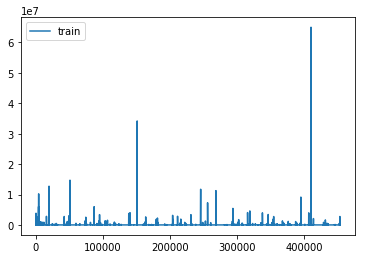

In [125]:
plt.plot(loss_list, label = 'train')
plt.legend();

In [126]:
predictions = [{'pred': int(x[0]), 'act':int(act_list[i][0])} for i, x in enumerate(pred_list) if int(x[0]) >= 10]

In [127]:
# Click predictions vs actual if prediction >= 10
predictions

[{'pred': 34, 'act': 0},
 {'pred': 14, 'act': 0},
 {'pred': 13, 'act': 4},
 {'pred': 14, 'act': 0},
 {'pred': 1016, 'act': 6},
 {'pred': 60, 'act': 0},
 {'pred': 74, 'act': 5},
 {'pred': 10, 'act': 0},
 {'pred': 2445, 'act': 43},
 {'pred': 13, 'act': 0},
 {'pred': 207, 'act': 7},
 {'pred': 21, 'act': 0},
 {'pred': 15, 'act': 0},
 {'pred': 827, 'act': 6},
 {'pred': 18, 'act': 0},
 {'pred': 10, 'act': 0},
 {'pred': 20, 'act': 0},
 {'pred': 87, 'act': 4},
 {'pred': 235, 'act': 4},
 {'pred': 11, 'act': 0},
 {'pred': 311, 'act': 0},
 {'pred': 539, 'act': 0},
 {'pred': 320, 'act': 1},
 {'pred': 2036, 'act': 38},
 {'pred': 13, 'act': 0},
 {'pred': 14, 'act': 0},
 {'pred': 13, 'act': 3},
 {'pred': 10, 'act': 0},
 {'pred': 725, 'act': 6},
 {'pred': 8175, 'act': 2},
 {'pred': 300, 'act': 1},
 {'pred': 131, 'act': 1},
 {'pred': 155, 'act': 6},
 {'pred': 94, 'act': 44},
 {'pred': 176, 'act': 7},
 {'pred': 38, 'act': 2},
 {'pred': 134, 'act': 1},
 {'pred': 21, 'act': 9},
 {'pred': 137, 'act': 2},
 